In [48]:
import pandas as pd, numpy as np
import nltk, re
from string import punctuation


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('datasets/spam_short.csv')

In [52]:
print(data.head(5))
print(data.tail(10))
print(data.sample(7))
print(data.iloc[[34, 57, 109]])

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
       v1                                                 v2
150   ham                          Ok... Ur typical reply...
151   ham  As per your request 'Melle Melle (Oru Minnamin...
152   ham  You are everywhere dirt, on the floor, the win...
153   ham                       Aaooooright are you at work?
154   ham                        I'm leaving my house now...
155   ham  Hello, my love. What are you doing? Did you ge...
156  spam  Customer service annoncement. You have a New Y...
157  spam  You are a winner U have been specially selecte...
158   ham  Keep yourself safe for me because I need you a...
159   ham  New car and house for my 

In [53]:
#4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      160 non-null    object
 1   v2      160 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [54]:
#5
stats = data.describe()
stats

,v1,v2
count,160,160
unique,2,158
top,ham,As per your request 'Melle Melle (Oru Minnamin...
freq,133,3


In [55]:
#6
duplicate_email = stats['v2'].loc['top']
print(duplicate_email)
data[data.v2 == duplicate_email]

data = data.drop_duplicates(subset=['v2'])
print(data.shape)
new_stats = data.describe()
new_stats

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
(158, 2)


,v1,v2
count,158,158
unique,2,158
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,131,1


Text(0.5, 1.0, 'Class distribution')

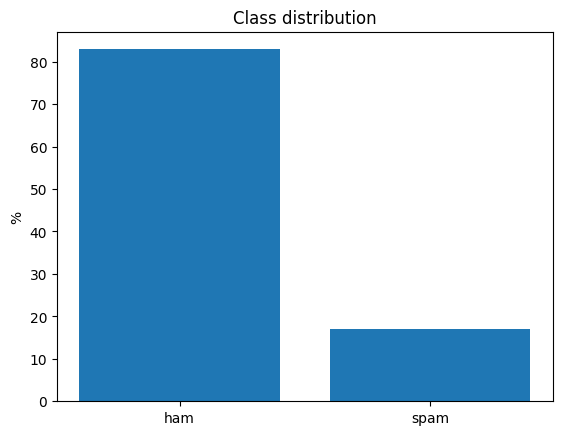

In [56]:
ham_perc = new_stats['v1'].loc['freq']/new_stats['v1'].loc['count'] * 100
spam_perc = 100 - ham_perc
plt.bar(['ham', 'spam'], [ham_perc, spam_perc])
plt.ylabel('%')
plt.title('Class distribution')

In [57]:
#7 a
message = data['v2'].iloc[28]
print(message)
type(message), len(message)

I'm back &amp; we're packing the car now, I'll let you know if there's room


(str, 75)

In [58]:
#7b
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [59]:
regex = r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'
message = re.sub(regex, ' ', message)
print(message)


I'm back &amp; we're packing the car now, I'll let you know if there's room


In [60]:
#8
spam_df = data[data.v1 == 'spam']
ham_df = data[data.v1 == 'ham']

In [61]:
#9
spam_emails = list(spam_df.v2)
ham_emails = list(ham_df.v2)
print(spam_emails[:5])
print(ham_emails[:5])

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030', 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', 'U dun say so early hor... U c already then say...', "Nah I don't think he goes

In [62]:
#10
spam_digit_emails = [re.sub(r'\d+', ' DIGITS ', email) for email in spam_emails]

ham_digit_emails = [re.sub(r'\d+', ' DIGITS ', email) for email in ham_emails]

print(spam_digit_emails[:5])
print(ham_digit_emails[:5])

["Free entry in  DIGITS  a wkly comp to win FA Cup final tkts  DIGITS st May  DIGITS . Text FA to  DIGITS  to receive entry question(std txt rate)T&C's apply  DIGITS over DIGITS 's", "FreeMsg Hey there darling it's been  DIGITS  week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£ DIGITS . DIGITS  to rcv", 'WINNER!! As a valued network customer you have been selected to receivea å£ DIGITS  prize reward! To claim call  DIGITS . Claim code KL DIGITS . Valid  DIGITS  hours only.', 'Had your mobile  DIGITS  months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on  DIGITS ', 'SIX chances to win CASH! From  DIGITS  to  DIGITS , DIGITS  pounds txt> CSH DIGITS  and send to  DIGITS . Cost  DIGITS p/day,  DIGITS days,  DIGITS + TsandCs apply Reply HL  DIGITS  info']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
#10b
def token_percentage(token, texts):
    token_count = 0
    all_tokens_count = 0
    for text in texts:
        tokens = nltk.word_tokenize(text)
        token_count += tokens.count(tokens)
        all_tokens_count += len(tokens)
    return token_count/all_tokens_count * 100




Text(0.5, 1.0, 'Distribution of DIGITS occurrences by class')

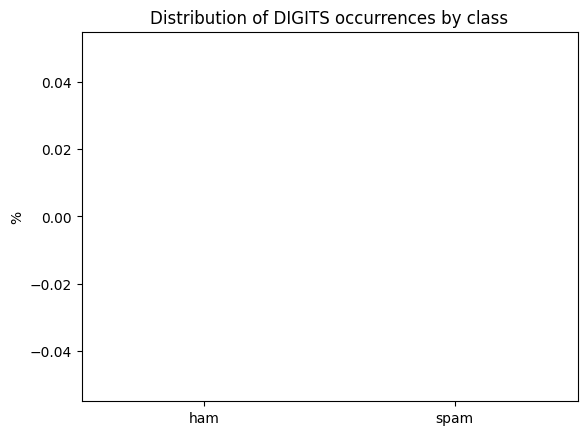

In [65]:
#10c
perc_spam_digits = token_percentage("DIGITS", spam_digit_emails)
perc_ham_digits = token_percentage("DIGITS", ham_digit_emails)

plt.bar(['ham', 'spam'], [perc_ham_digits, perc_spam_digits])
plt.ylabel("%")
plt.title("Distribution of DIGITS occurrences by class")

Text(0.5, 1.0, 'Distribution of FREE occurences by class')

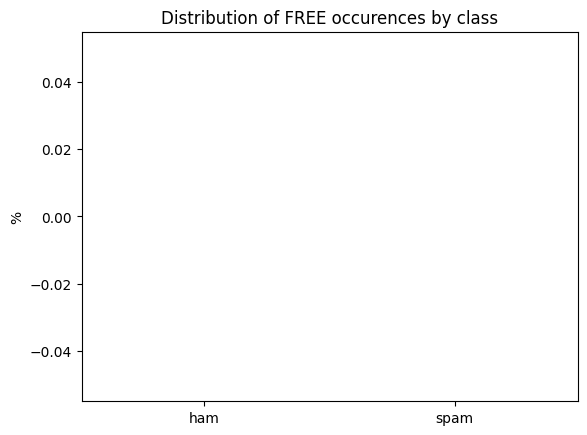

In [66]:
#10d
perc_spam_free = token_percentage("FREE", spam_digit_emails)
perc_ham_free = token_percentage("FREE", ham_digit_emails)
plt.bar(['ham', 'spam'], [perc_ham_free, perc_spam_free])
plt.ylabel("%")
plt.title("Distribution of FREE occurences by class")